<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-msc/blob/main/homework/classwork-01-solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classwork 1 - QM for Nanosciences

## Names:

### Deadline:

Sunday 11th December 2022 (by 5pm)


### Instructions:

- The assignment should be written and submitted in groups of 2 people.


- When you finish, please add your names, download your ipynb file, and send it to my email: wbanda@yachaytech.edu.ec

### Problem 1

1. Write python functions to compute the spectral radiance of a body for different frequencies, $\nu$, and different (absolute) temperatures, $T$, according to the Rayleigh-Jeans and the Planck laws.


2. Add a label indicating the UV side of the spectrum.


3. Now, make the plots of spectral radiance versus wavelength, also for both laws.


4. Repeat the plot adding markers to show the expectation values according to Wien's displacement law for a couple of temperature-wavelength pairs.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Import scipy to access physical constants
import scipy.constants as cte

### Rayleigh-Jeans law (classical equation):

$$B_{\lambda}= \frac{2ck_BT}{\lambda^4} $$



In [ ]:
# Check constants
# Documentation: https://docs.scipy.org/doc/scipy/reference/constants.html

print(cte.c) # speed of light in m/s
print(cte.k) # Boltzmann constant in SI units J/K

299792458.0
1.380649e-23


In [ ]:
# Vector for wavelengths (lambda values)

lb = np.arange(1.e-9, 5000.e-9, 1.e-9) # 1m=1.e-9nm

# Assign one single value to the temperature

tp = 5800 # in K

In [ ]:
c  = cte.c # fix light speed
kb = cte.k # fix Boltzmann constant

# Define function for spectral radiance

def rayleigh(lb, tp):

  B_l = (2*c*kb*tp)/(lb**4) #spectral radiance in SI units

  return B_l # values that we want the function to output

In [ ]:
# Create Y axis

rad = rayleigh(lb, tp)

In [ ]:
# Check sizes of the vectors

print(lb.shape, rad.shape)

(4999,) (4999,)


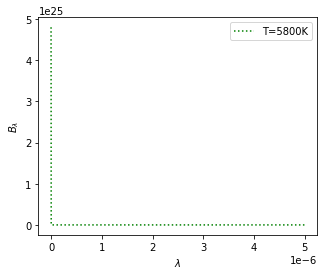

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (5,4))

# We plot
plt.plot(lb , rad, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Labels
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$") # 'r' is to access latex notation

# Add limits to axes
#plt.xlim(0, 1000e-9)


# Add labels
plt.legend()

# We display the plot
plt.show()


### Planck's law:

$$B_\lambda =\frac{2hc^2}{\lambda^5}\frac 1{ \exp\left(\frac{hc}{\lambda k_\mathrm B T}\right) - 1}$$

In [ ]:
# Define Planck constant
h = cte.h # J s

print(h)

# Planck function
def planck(lb, tp):
  
  B_l = ((2*h*c**2)/(lb**5))*((1)/(np.exp((h*c)/(lb*kb*tp)) - 1)) #spectral radiance in SI units

  return B_l # values that we want the function to output

6.62607015e-34


In [ ]:
# Create Y axis

rad2 = planck(lb, tp)

<ipython-input-90-7c1ddda87ce5>:9: RuntimeWarning: overflow encountered in exp
  B_l = ((2*h*c**2)/(lb**5))*((1)/(np.exp((h*c)/(lb*kb*tp)) - 1)) #spectral radiance in SI units


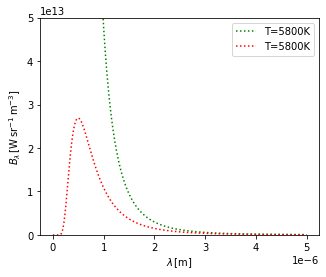

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (5,4))

# We plot
plt.plot(lb , rad, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
plt.plot(lb , rad2, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Labels
plt.xlabel(r"$\lambda\,\rm[m]$")
plt.ylabel(r"$B_{\lambda}\,\rm [W\,sr^{-1}\,m^{-3}]$") # 'r' is to access latex notation

# Add limits to axes
#plt.xlim(0, 1000e-9)
plt.ylim(0, 5.e13)


# Add labels
plt.legend()

# We display the plot
plt.show()


In [ ]:
# Normalise axes to better units

lb_axis = lb*1.e9 # this in the x-axis in [nm]

# Below we work with the y-axis
rad1_axis = rad*1.e-12 # this is in units of [KW/m^2/nm/sr]
rad2_axis = rad2*1.e-12 # this is in units of [KW/m^2/nm/sr]

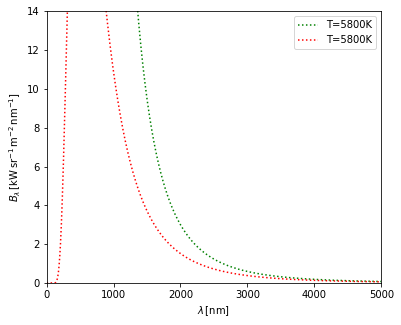

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(lb_axis , rad1_axis, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
plt.plot(lb_axis , rad2_axis, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [kW\,sr^{-1}\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
plt.xlim(0, 5000)
plt.ylim(0, 1.4e1)


# Add labels
plt.legend()

# We display the plot
plt.show()


In [ ]:
# Define Wien's displacement law

# Fix b

b = 2.898e-3 # in meter*Kelvin

def wien(tp):

  # Peak lambda
  l_max = b/tp # in m

  return l_max

In [ ]:
# Print the value of wavelength

lm = wien(tp)

print(tp, lm)

5800 4.996551724137931e-07


In [ ]:
# Evaluate the spectral radiance in that value

rad_lm = planck(lm, tp)

print(tp, lm, rad_lm)

5800 4.996551724137931e-07 26882237528442.22


In [ ]:
# Normalise to the same units as before

lm_nm      = lm*1.e9 # in [nm]
rad_lm_new = rad_lm*1.e-12 # in [kW/m^2/sr/nm]

print(tp, lm_nm, rad_lm_new)

5800 499.65517241379314 26.882237528442218


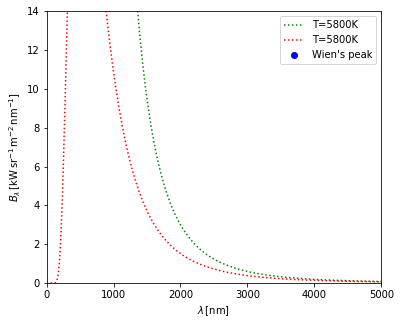

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(lb_axis , rad1_axis, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
plt.plot(lb_axis , rad2_axis, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Add peak
plt.plot(lm_nm, rad_lm_new, color='blue', marker = 'o', linestyle=" ", label = "Wien's peak")

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [kW\,sr^{-1}\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
plt.xlim(0, 5000)
plt.ylim(0, 1.4e1)


# Add labels
plt.legend()

# We display the plot
plt.show()


### Problem 2

1. Make a plot of the Solar spectrum, which can be found here: https://github.com/wbandabarragan/quantum-mechanics-msc/blob/main/data/AM0AM1_5.csv

    **Hint:** Don't forget to consider the solid angle (we are far away from the Sun!).


2. Corroborate whether or not it follows Planck’s law. Is the Sun a black body?


3. What is the temperature of the Sun?

In [ ]:
# Importing libraries
import pandas as pd

In [ ]:
# First let's mount our Drive folder:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To display contents in that folder

!ls "/content/drive/MyDrive/Colab Notebooks"

107-predictor-corrector-methods.ipynb  homework001_solutions.ipynb  QM5.ipynb
AM0AM1_5.csv			       homework-01.ipynb	    QM6.ipynb
classwork001_solutions.ipynb	       Obsolete
classwork-01.ipynb		       QM0.ipynb


In [ ]:
# Reading CSV file

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AM0AM1_5.csv", sep=",")

In [ ]:
print(data)

      Wavelength (nm)  Extraterrestrial W*m-2*nm-1  Global tilt  W*m-2*nm-1  \
0               280.0                      0.08200             4.730900e-23   
1               280.5                      0.09900             1.230700e-21   
2               281.0                      0.15000             5.689500e-21   
3               281.5                      0.21200             1.566200e-19   
4               282.0                      0.26700             1.194600e-18   
...               ...                          ...                      ...   
1997           3980.0                      0.00884             7.387200e-03   
1998           3985.0                      0.00880             7.432700e-03   
1999           3990.0                      0.00878             7.372300e-03   
2000           3995.0                      0.00870             7.210000e-03   
2001           4000.0                      0.00868             7.104300e-03   

      Direct+circumsolar W*m-2*nm-1  Wavelength (nm

In [ ]:
# Let's access the data

wavelength = data["Wavelength (nm)"]
solarspect = data["Extraterrestrial W*m-2*nm-1"]

#print(np.array(solarspect))

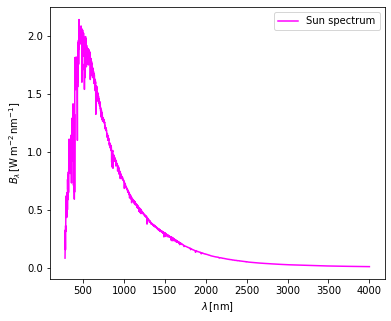

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(wavelength, solarspect, color='magenta', linestyle='-', label = "Sun spectrum")
#plt.plot(lb_axis , rad1_axis, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
#plt.plot(lb_axis , rad2_axis, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Add peak
#plt.plot(lm_nm, rad_lm_new, color='blue', marker = 'o', linestyle=" ", label = "Wien's peak")

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [W\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
#plt.xlim(0, 5000)
#plt.ylim(0, 1.4e1)


# Add labels
plt.legend()

# We display the plot
plt.show()


In [ ]:
# Convert Solar spectrum from W to kW

solarspect_kW = solarspect/1.e3 # in [kW/m^2/nm]

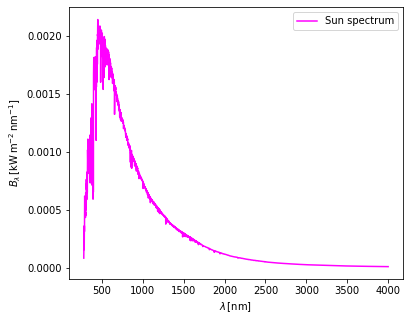

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(wavelength, solarspect_kW, color='magenta', linestyle='-', label = "Sun spectrum")
#plt.plot(lb_axis , rad1_axis, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
#plt.plot(lb_axis , rad2_axis, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Add peak
#plt.plot(lm_nm, rad_lm_new, color='blue', marker = 'o', linestyle=" ", label = "Wien's peak")

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [kW\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
#plt.xlim(0, 5000)
#plt.ylim(0, 1.4e1)


# Add labels
plt.legend()

# We display the plot
plt.show()


In [ ]:
# We calculate B_lambda considering the Sun size on the sky
# https://en.wikipedia.org/wiki/Solid_angle

rad1_axis_sr = rad1_axis*6.794e-5  # in [kW/m^2/nm]
rad2_axis_sr = rad2_axis*6.794e-5  # in [kW/m^2/nm]

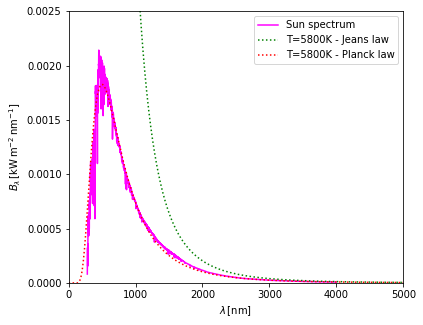

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(wavelength, solarspect_kW, color='magenta', linestyle='-', label = "Sun spectrum")
plt.plot(lb_axis , rad1_axis_sr, color='green', linestyle=':', label = f"T={tp}K - Jeans law") #, marker = 'o')
plt.plot(lb_axis , rad2_axis_sr, color='red', linestyle=':', label = f"T={tp}K - Planck law") #, marker = 'o')

# Add peak
#plt.plot(lm_nm, rad_lm_new, color='blue', marker = 'o', linestyle=" ", label = "Wien's peak")

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [kW\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
plt.xlim(0, 5000)
plt.ylim(0, 2.5e-3)

# Add labels
plt.legend()

# We display the plot
plt.show()
